In [1]:
import procaliper as pc
import procaliper.protein_structure as ps
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
protein = pc.Protein.from_uniprot_id("Q9NRG1")
protein.fetch_pdb(save_path="scratch2.pdb")

Fetched: 1 / 1


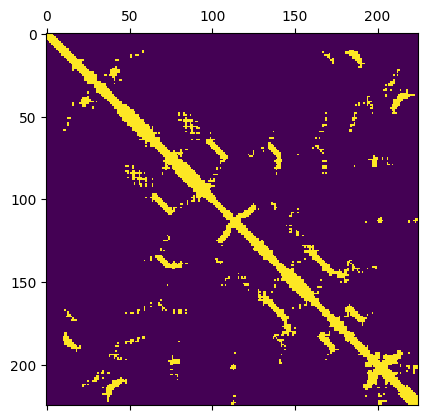

In [3]:
cm = ps.distance.contact_map(protein.get_biopython_structure(), max_dist_angsrtom=10)
plt.matshow(cm, interpolation="none")

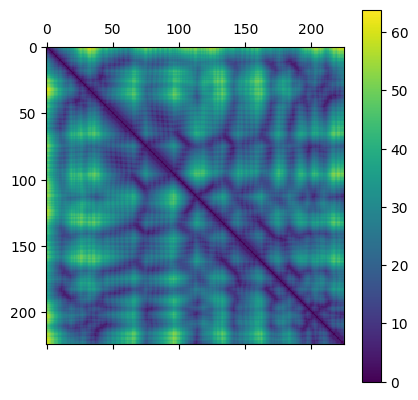

In [4]:
dm = ps.distance.distance_matrix(protein.get_biopython_structure())
plt.matshow(dm, interpolation="none")
plt.colorbar()

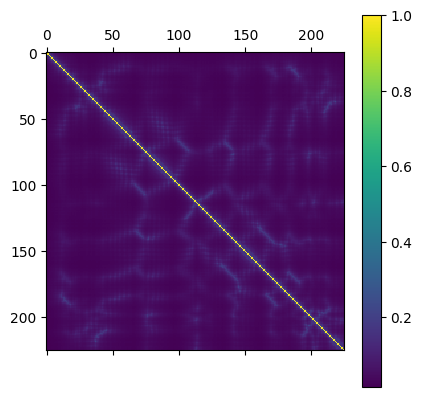

In [5]:
pm = ps.distance.proximity_matrix(protein.get_biopython_structure())
plt.matshow(pm, interpolation="none")
plt.colorbar()

In [6]:
site_df = pd.DataFrame(protein.unravel_sites())
site_df

,beta_strand,entry,residue_letter,protein_names,residue_number,turn,entry_name,helix,gene_names,binding,length,active_data,disulfide_bond,reviewed,binding_data,organism,active,dna_binding
0,False,Q9NRG1,M,Phosphoribosyltransferase domain-containing pr...,1,False,PRDC1_HUMAN,False,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False
1,False,Q9NRG1,A,Phosphoribosyltransferase domain-containing pr...,2,False,PRDC1_HUMAN,False,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False
2,False,Q9NRG1,G,Phosphoribosyltransferase domain-containing pr...,3,False,PRDC1_HUMAN,False,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False
3,False,Q9NRG1,S,Phosphoribosyltransferase domain-containing pr...,4,False,PRDC1_HUMAN,False,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False
4,False,Q9NRG1,S,Phosphoribosyltransferase domain-containing pr...,5,False,PRDC1_HUMAN,False,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,False,Q9NRG1,E,Phosphoribosyltransferase domain-containing pr...,221,False,PRDC1_HUMAN,True,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False
221,False,Q9NRG1,K,Phosphoribosyltransferase domain-containing pr...,222,False,PRDC1_HUMAN,True,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False
222,False,Q9NRG1,Y,Phosphoribosyltransferase domain-containing pr...,223,False,PRDC1_HUMAN,False,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False
223,False,Q9NRG1,R,Phosphoribosyltransferase domain-containing pr...,224,False,PRDC1_HUMAN,False,PRTFDC1 HHGP,False,225,{},False,reviewed,{},Homo sapiens (Human),False,False


In [7]:
[i for i, x in enumerate(site_df["binding"]) if x]

[140, 141, 142, 143, 144, 145, 146, 147, 148, 172, 193, 194, 200]

In [8]:
regions_indices = [
    [140, 141, 142, 143, 144, 145, 146, 147, 148],
    [172],
    [193, 194],
    [200],
]

In [9]:
residues = protein.get_biopython_residues()
regions = [[residues[i] for i in region] for region in regions_indices]
regions

[[<Residue GLU het=  resseq=141 icode= >,
  <Residue ASP het=  resseq=142 icode= >,
  <Residue VAL het=  resseq=143 icode= >,
  <Residue VAL het=  resseq=144 icode= >,
  <Residue GLY het=  resseq=145 icode= >,
  <Residue THR het=  resseq=146 icode= >,
  <Residue GLY het=  resseq=147 icode= >,
  <Residue ARG het=  resseq=148 icode= >,
  <Residue THR het=  resseq=149 icode= >],
 [<Residue LYS het=  resseq=173 icode= >],
 [<Residue PHE het=  resseq=194 icode= >,
  <Residue VAL het=  resseq=195 icode= >],
 [<Residue ASP het=  resseq=201 icode= >]]

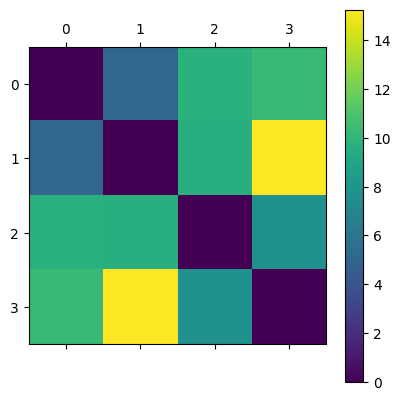

In [10]:
rpm = ps.distance.region_distance_matrix(regions)
plt.matshow(rpm, interpolation="none")
plt.colorbar()

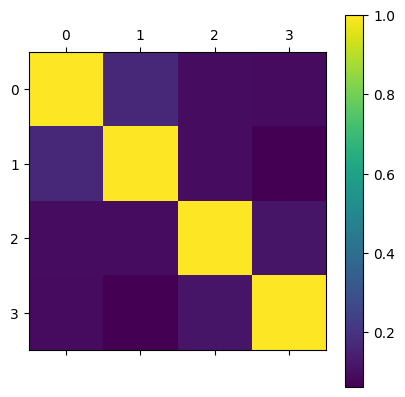

In [11]:
rdm = ps.distance.region_proximity_matrix(regions)
plt.matshow(rdm, interpolation="none")
plt.colorbar()